<h1 style="text-align: center;">Variables MONTO_IMPONIBLE e IMPUESTO_TOTAL</h1>


Cargamos el DataSet

In [1]:
import pandas as pd

dataset_work_2 = pd.read_csv('D:\DataSet\dataset_work_2.csv')
x = dataset_work_2.iloc[:,:-1]
y = dataset_work_2.iloc[:,-1].values
dataset_work_2.shape

(6435903, 21)

### Outliers

In [ ]:
# Lista de variables numéricas a analizar
variables = ['IMPUESTO_TOTAL', 'MONTO_IMPONIBLE']

outliers_summary = {}

# Calcular outliers usando IQR para cada variable
for variable in variables:
    Q1 = dataset_work_2[variable].quantile(0.25)
    Q3 = dataset_work_2[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar outliers
    outliers = dataset_work_2[(dataset_work_2[variable] < lower_bound) | (dataset_work_2[variable] > upper_bound)]
    
    # Guardar resultados en un diccionario
    outliers_summary[variable] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers)
    }

# Convertir el resumen de outliers en un DataFrame para una mejor visualización
outliers_summary_dataset_work_2 = pd.DataFrame(outliers_summary).T

print(outliers_summary_dataset_work_2)

                 Lower Bound  Upper Bound  Number of Outliers
IMPUESTO_TOTAL      -1892.58       3154.3            972996.0
MONTO_IMPONIBLE    -62527.50     104212.5            996789.0


In [3]:
def calcular_estadisticas_completas(df, columna):
    # Obtener estadísticas básicas con describe()
    estadisticas = dataset_work_2[columna].describe()
    
    # Calcular estadísticas adicionales
    estadisticas['asimetria'] = df[columna].skew()
    estadisticas['curtosis'] = df[columna].kurtosis()
    estadisticas['varianza'] = df[columna].var()
    
    return estadisticas

# Llamada a la función
estadisticas_completas = calcular_estadisticas_completas(dataset_work_2, 'MONTO_IMPONIBLE')
display(estadisticas_completas)

count        6.435903e+06
mean         3.299064e+05
std          8.389775e+06
min          0.000000e+00
25%          0.000000e+00
50%          6.620280e+03
75%          4.168500e+04
max          6.477645e+09
asimetria    3.247584e+02
curtosis     1.660070e+05
varianza     7.038832e+13
Name: MONTO_IMPONIBLE, dtype: float64

In [4]:
def calcular_estadisticas_completas(df, columna):
    # Obtener estadísticas básicas con describe()
    estadisticas = dataset_work_2[columna].describe()
    
    # Calcular estadísticas adicionales
    estadisticas['asimetria'] = df[columna].skew()
    estadisticas['curtosis'] = df[columna].kurtosis()
    estadisticas['varianza'] = df[columna].var()
    
    return estadisticas

# Llamada a la función
estadisticas_completas = calcular_estadisticas_completas(dataset_work_2, 'IMPUESTO_TOTAL')
display(estadisticas_completas)

count        6.435903e+06
mean         8.627253e+03
std          2.036738e+05
min          0.000000e+00
25%          0.000000e+00
50%          1.925000e+02
75%          1.261720e+03
max          1.436524e+08
asimetria    2.276844e+02
curtosis     8.598111e+04
varianza     4.148300e+10
Name: IMPUESTO_TOTAL, dtype: float64

In [5]:
# Contar los valores que son iguales a 0
cantidad_cero = (dataset_work_2['MONTO_IMPONIBLE'] == 0).sum()

# Contar los valores que están entre 0 y 10 (excluyendo 0)
cantidad_negativa = (dataset_work_2['MONTO_IMPONIBLE'] < 0).sum()

# Contar los valores que son mayores a 10
cantidad_mas_de_0 = (dataset_work_2['MONTO_IMPONIBLE'] > 0).sum()

# Mostrar los resultados
print(f"Cantidad de valores igual a 0 en MONTO_IMPONIBLE: {cantidad_cero}")
print(f"Cantidad de valores negativos MONTO_IMPONIBLE: {cantidad_negativa}")
print(f"Cantidad de valores mayores a 0 en MONTO_IMPONIBLE: {cantidad_mas_de_0}")

Cantidad de valores igual a 0 en MONTO_IMPONIBLE: 2190449
Cantidad de valores negativos MONTO_IMPONIBLE: 0
Cantidad de valores mayores a 0 en MONTO_IMPONIBLE: 4245454


In [6]:
# Contar los valores que son iguales a 0
cantidad_cero = (dataset_work_2['IMPUESTO_TOTAL'] == 0).sum()

# Contar los valores que están entre 0 y 10 (excluyendo 0)
cantidad_negativa = (dataset_work_2['IMPUESTO_TOTAL'] < 0).sum()

# Contar los valores que son mayores a 10
cantidad_mas_de_0 = (dataset_work_2['IMPUESTO_TOTAL'] > 0).sum()

# Mostrar los resultados
print(f"Cantidad de valores igual a 0 en IMPUESTO_TOTAL: {cantidad_cero}")
print(f"Cantidad de valores negativos IMPUESTO_TOTAL: {cantidad_negativa}")
print(f"Cantidad de valores mayores a 0 en IMPUESTO_TOTAL: {cantidad_mas_de_0}")

Cantidad de valores igual a 0 en IMPUESTO_TOTAL: 2343582
Cantidad de valores negativos IMPUESTO_TOTAL: 0
Cantidad de valores mayores a 0 en IMPUESTO_TOTAL: 4092321


### Análisis y Transformación de la Variable MONTO_IMPONIBLE

La variable **MONTO_IMPONIBLE** presenta características que justifican la aplicación de una transformación logarítmica para su tratamiento previo a ser utilizada en el modelo predictivo. A continuación, se detallan los principales aspectos del análisis realizado:

**Análisis Exploratorio:**
1. **Distribución:** Se observa que **MONTO_IMPONIBLE** tiene una distribución altamente sesgada hacia la derecha, lo cual es común en variables relacionadas con montos o ingresos, ya que los valores más altos tienden a ser menos frecuentes pero extremadamente grandes.
2. **Outliers:** Un análisis preliminar de los datos revela la presencia de un número significativo de valores atípicos (cerca de un millón de registros fuera del rango esperado). Estos valores extremos pueden influir negativamente en el desempeño de los modelos de machine learning, especialmente aquellos que son sensibles a variaciones en la escala de los datos.

**Transformación Aplicada:**
Para abordar estas características, se optó por aplicar una **transformación logarítmica** a la variable MONTO_IMPONIBLE. Este enfoque es ampliamente utilizado en problemas de ciencia de datos cuando se trabaja con variables con distribuciones sesgadas o con outliers significativos.

**Justificación de la Transformación Logarítmica:**
1. **Reducción de la asimetría:** La transformación logarítmica es efectiva para aproximar la distribución de la variable a una forma más simétrica, facilitando su interpretación y procesamiento por los modelos.
2. **Mitigación de outliers:** Esta transformación comprime los valores más altos, disminuyendo el impacto de los valores extremos sin eliminarlos, lo que permite preservar la información valiosa que contienen.
3. **Mejora de relaciones lineales:** En problemas de predicción, una transformación logarítmica puede ayudar a mejorar la relación entre la variable independiente (MONTO_IMPONIBLE) y las variables dependientes, lo que es especialmente beneficioso para modelos lineales como la regresión logística.
4. **Escalamiento más manejable:** Al comprimir la escala de la variable, los algoritmos de aprendizaje automático pueden trabajar de manera más eficiente, evitando problemas numéricos o de convergencia.


In [7]:
import numpy as np 

# Copiamos el dataset en otro para seguir trabajando y resguardar el dataset original 
dataset_work_5 = dataset_work_2.copy()

# Aplicar la transformación logarítmica a MONTO_IMPONIBLE
dataset_work_5['MONTO_IMPONIBLE_LOG'] = np.log1p(dataset_work_5['MONTO_IMPONIBLE'])

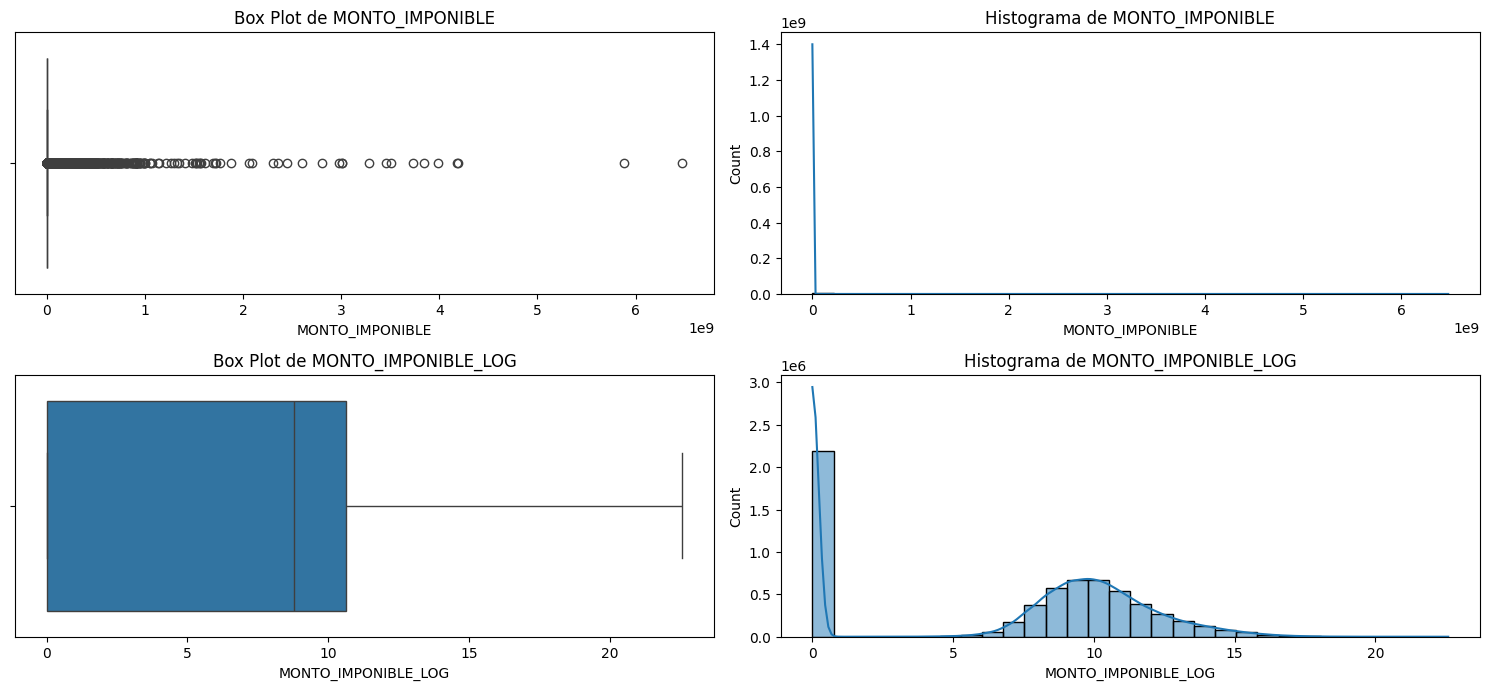

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_5['MONTO_IMPONIBLE'])
plt.title('Box Plot de MONTO_IMPONIBLE')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_5['MONTO_IMPONIBLE'], bins=30, kde=True)
plt.title('Histograma de MONTO_IMPONIBLE')


# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 3)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_5['MONTO_IMPONIBLE_LOG'])
plt.title('Box Plot de MONTO_IMPONIBLE_LOG')

# Crear el histograma
plt.subplot(3, 2, 4)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_5['MONTO_IMPONIBLE_LOG'], bins=30, kde=True)
plt.title('Histograma de MONTO_IMPONIBLE_LOG')

# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

### Análisis y Transformación de la Variable IMPUESTO_TOTAL

La variable **IMPUESTO_TOTAL** comparte características similares con **MONTO_IMPONIBLE**, lo que hace que sea necesario un preprocesamiento adecuado para mejorar su manejo en el modelo predictivo. A continuación, se presenta el análisis realizado y la justificación para la transformación aplicada:

**Análisis Exploratorio:**
1. **Distribución:** La variable **IMPUESTO_TOTAL** muestra una distribución sesgada hacia la derecha, característica típica en variables monetarias, donde la mayoría de los contribuyentes pagan montos relativamente bajos y unos pocos pagan valores excepcionalmente altos.
2. **Outliers:** El análisis reveló la presencia de casi un millón de valores extremos (outliers). Estos valores representan un desafío porque pueden influir desproporcionadamente en el desempeño de los modelos, especialmente aquellos sensibles a la escala de los datos.

**Transformación Aplicada:**
Se decidió aplicar una **transformación logarítmica** a la variable **IMPUESTO_TOTAL** para abordar los problemas mencionados. Este tipo de transformación es una práctica común en ciencia de datos cuando se trabaja con variables monetarias que tienen distribuciones sesgadas y contienen outliers significativos.

**Justificación de la Transformación Logarítmica:**
1. **Reducción de la asimetría:** Al igual que con **MONTO_IMPONIBLE**, la transformación logarítmica ayuda a reducir la asimetría de la distribución, facilitando que los modelos interpreten y procesen la variable de manera más efectiva.
2. **Mitigación del impacto de outliers:** La transformación logarítmica comprime los valores extremos, disminuyendo su influencia sin necesidad de excluirlos, lo cual preserva información relevante para los modelos predictivos.
3. **Relación con otras variables:** En caso de que exista una relación multiplicativa entre **MONTO_IMPONIBLE** e **IMPUESTO_TOTAL**, la transformación logarítmica tiene la ventaja de linealizar dicha relación, lo cual mejora la interpretabilidad y el rendimiento de los modelos, particularmente en algoritmos como la regresión lineal o logística.
4. **Escalamiento más eficiente:** Este enfoque hace que la escala de la variable sea más manejable, lo que beneficia la estabilidad y la capacidad de aprendizaje de los algoritmos.

In [9]:
# Aplicar la transformación logarítmica a IMPUESTO_TOTAL
dataset_work_5['IMPUESTO_TOTAL_LOG'] = np.log1p(dataset_work_5['IMPUESTO_TOTAL'])

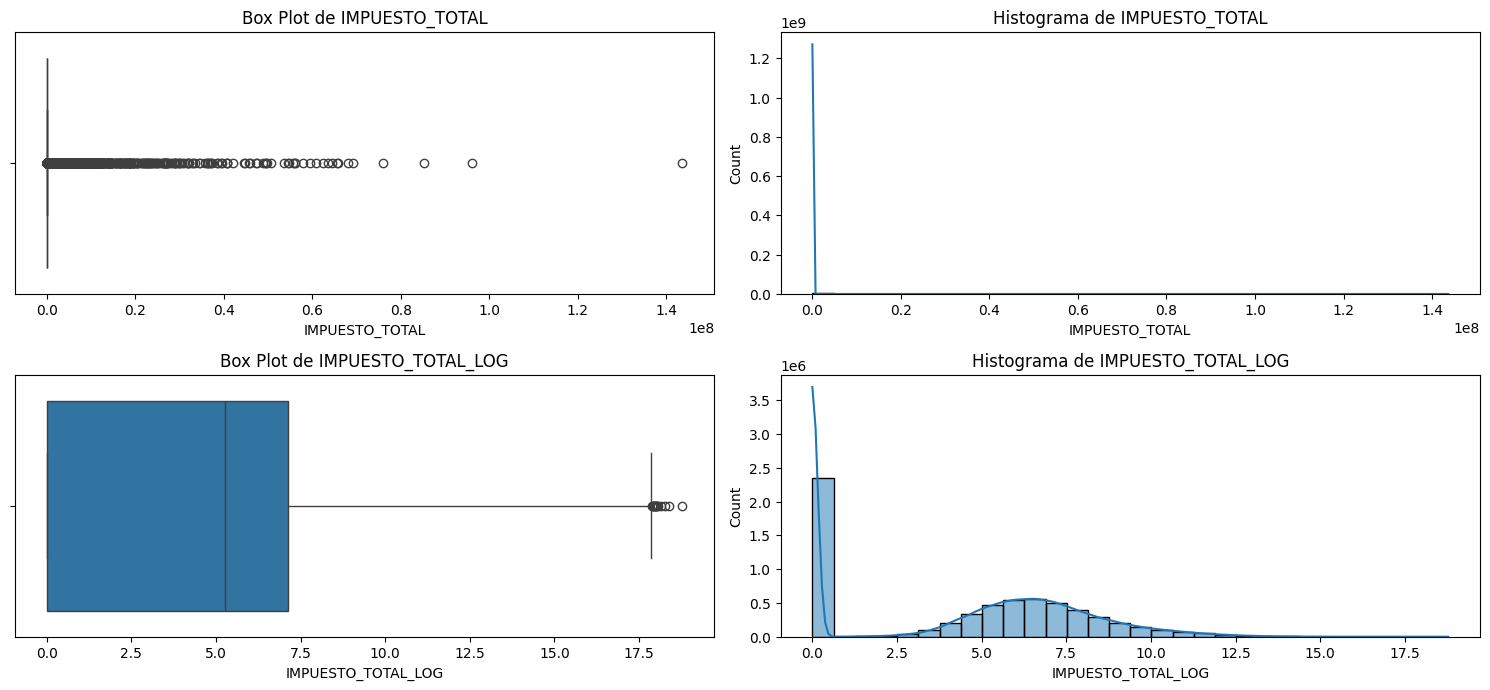

In [10]:
# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_5['IMPUESTO_TOTAL'])
plt.title('Box Plot de IMPUESTO_TOTAL')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_5['IMPUESTO_TOTAL'], bins=30, kde=True)
plt.title('Histograma de IMPUESTO_TOTAL')

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 3)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_5['IMPUESTO_TOTAL_LOG'])
plt.title('Box Plot de IMPUESTO_TOTAL_LOG')

# Crear el histograma
plt.subplot(3, 2, 4)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_5['IMPUESTO_TOTAL_LOG'], bins=30, kde=True)
plt.title('Histograma de IMPUESTO_TOTAL_LOG')


# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()


# Conclusión
La transformación logarítmica es la opción más adecuada para ambas variables, MONTO_IMPONIBLE e IMPUESTO_TOTAL, debido a su capacidad para manejar distribuciones sesgadas y reducir el impacto de los outliers, lo que conduce a un mejor rendimiento de los modelos de aprendizaje automático y una interpretación más clara de las relaciones entre variables.

### Ordenamos las columnas

In [11]:
# Asegúrate de que las columnas de tu DataFrame estén en el orden correcto y eliminando las que no necesites
columns_order = ['PERIODO', 'MONTO_IMPONIBLE', 'MONTO_IMPONIBLE_LOG','IMPUESTO_TOTAL','IMPUESTO_TOTAL_LOG', 'PERCEPCIONES',
       'RETENCIONES', 'IF_BENEFICIO_LEY6093', 'IF_MECENAZCO_LEY1353',
       'IF_CALL_CENTER_LEY1669', 'IF_SPONZORIZACION_LEY1772',
       'IF_PROCHACO_LEY1822', 'IF_PYMES_LEY2077', 'IF_GEMP_LEY2266',
       'IF_OTROS', 'EMPLEADOS', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD', 'INFLACION', 'MOROSIDAD']

# Reorganizar las columnas del DataFrame
dataset_work_5 = dataset_work_5[columns_order]


In [12]:
# Lista de variables numéricas a analizar
variables = ['MONTO_IMPONIBLE', 'MONTO_IMPONIBLE_LOG',  'IMPUESTO_TOTAL', 'IMPUESTO_TOTAL_LOG']

outliers_summary = {}

# Calcular outliers usando IQR para cada variable
for variable in variables:
    Q1 = dataset_work_5[variable].quantile(0.25)
    Q3 = dataset_work_5[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar outliers
    outliers = dataset_work_5[(dataset_work_5[variable] < lower_bound) | (dataset_work_5[variable] > upper_bound)]
    
    # Guardar resultados en un diccionario
    outliers_summary[variable] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers)
    }

# Convertir el resumen de outliers en un DataFrame para una mejor visualización
outliers_summary_dataset_work_5 = pd.DataFrame(outliers_summary).T

print(outliers_summary_dataset_work_5)

                      Lower Bound    Upper Bound  Number of Outliers
MONTO_IMPONIBLE     -62527.500000  104212.500000            996789.0
MONTO_IMPONIBLE_LOG    -15.956881      26.594802                 0.0
IMPUESTO_TOTAL       -1892.580000    3154.300000            972996.0
IMPUESTO_TOTAL_LOG     -10.711535      17.852559                14.0


In [13]:
# Copiamos el dataset en otro para seguir trabajando y resguardar el dataset original 
dataset_work_6 = dataset_work_5.copy()

# Eliminar la columna 'IF_TRANS_LEY2936'
dataset_work_6 = dataset_work_6.drop(columns=['MONTO_IMPONIBLE', 'IMPUESTO_TOTAL'])
# Mostrar el DataFrame resultante
print(dataset_work_6.dtypes)

PERIODO                        int64
MONTO_IMPONIBLE_LOG          float64
IMPUESTO_TOTAL_LOG           float64
PERCEPCIONES                 float64
RETENCIONES                  float64
IF_BENEFICIO_LEY6093         float64
IF_MECENAZCO_LEY1353         float64
IF_CALL_CENTER_LEY1669       float64
IF_SPONZORIZACION_LEY1772    float64
IF_PROCHACO_LEY1822          float64
IF_PYMES_LEY2077             float64
IF_GEMP_LEY2266              float64
IF_OTROS                     float64
EMPLEADOS                      int64
PROVINCIA                    float64
LOCALIDAD                    float64
CONDICION_AFIP               float64
TAMANO                       float64
ACTIVIDAD                    float64
INFLACION                    float64
MOROSIDAD                      int64
dtype: object


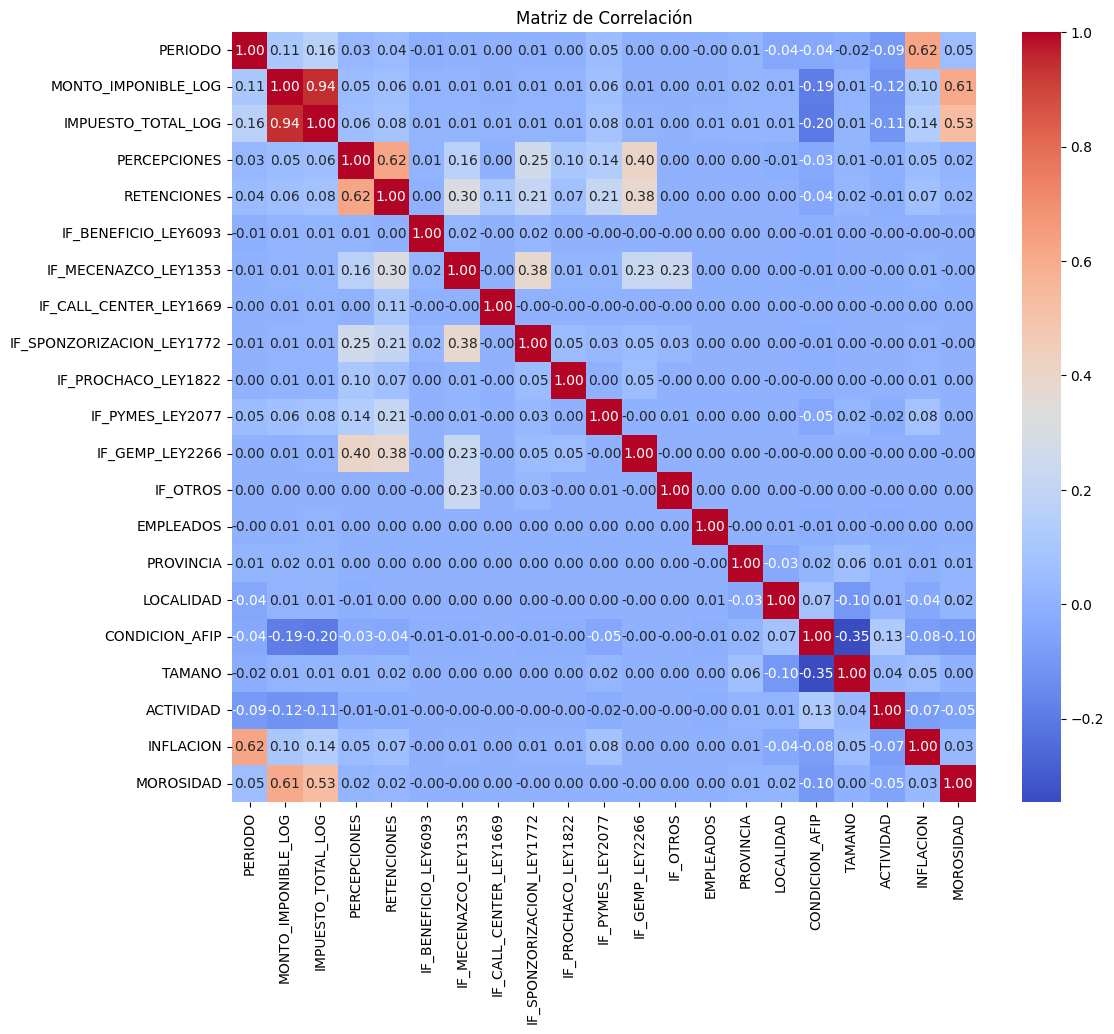

In [14]:
# Calcular la matriz de correlación
matriz_correlacion = dataset_work_6.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### Crear la Nueva Variable `INCENTIVO_FISCAL`

Podemos agrupar estas variables relacionadas con incentivos fiscales en una sola variable denominada **`INCENTIVO_FISCAL`** mediante ingeniería de características. La nueva variable será la suma de todas estas variables. Esta técnica de agregación puede simplificar el análisis y la modelización, especialmente si quieres capturar el efecto combinado de todos los incentivos fiscales en una única variable.

In [15]:
# Crear la nueva variable INCENTIVO_FISCAL sumando todas las variables relacionadas
dataset_work_6['INCENTIVO_FISCAL'] = (
    dataset_work_6['IF_BENEFICIO_LEY6093'] +
    dataset_work_6['IF_MECENAZCO_LEY1353'] +
    dataset_work_6['IF_CALL_CENTER_LEY1669'] +
    dataset_work_6['IF_SPONZORIZACION_LEY1772'] +
    dataset_work_6['IF_PROCHACO_LEY1822'] +
    dataset_work_6['IF_PYMES_LEY2077'] +
    dataset_work_6['IF_GEMP_LEY2266'] +
    dataset_work_6['IF_OTROS']
)

# Mostrar las primeras filas para verificar la nueva variable
display(dataset_work_6[['IF_BENEFICIO_LEY6093', 'IF_MECENAZCO_LEY1353', 
                        'IF_CALL_CENTER_LEY1669', 'IF_SPONZORIZACION_LEY1772',
                        'IF_PROCHACO_LEY1822', 'IF_PYMES_LEY2077',
                        'IF_GEMP_LEY2266', 'IF_OTROS', 
                        'INCENTIVO_FISCAL']].head())


,IF_BENEFICIO_LEY6093,IF_MECENAZCO_LEY1353,IF_CALL_CENTER_LEY1669,IF_SPONZORIZACION_LEY1772,IF_PROCHACO_LEY1822,IF_PYMES_LEY2077,IF_GEMP_LEY2266,IF_OTROS,INCENTIVO_FISCAL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
dataset_work_6.columns

Index(['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG', 'PERCEPCIONES',
       'RETENCIONES', 'IF_BENEFICIO_LEY6093', 'IF_MECENAZCO_LEY1353',
       'IF_CALL_CENTER_LEY1669', 'IF_SPONZORIZACION_LEY1772',
       'IF_PROCHACO_LEY1822', 'IF_PYMES_LEY2077', 'IF_GEMP_LEY2266',
       'IF_OTROS', 'EMPLEADOS', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD', 'INFLACION', 'MOROSIDAD', 'INCENTIVO_FISCAL'],
      dtype='object')

In [17]:
# Copiamos el dataset en otro para seguir trabajando y resguardar el dataset original 
dataset_work_7 = dataset_work_6.copy()

# Eliminar las variables relacionadas con incentivos fiscales del dataset_work_7
dataset_work_7 = dataset_work_7.drop(columns=[
    'IF_BENEFICIO_LEY6093', 
    'IF_MECENAZCO_LEY1353', 
    'IF_CALL_CENTER_LEY1669', 
    'IF_SPONZORIZACION_LEY1772', 
    'IF_PROCHACO_LEY1822', 
    'IF_PYMES_LEY2077', 
    'IF_GEMP_LEY2266', 
    'IF_OTROS'
])

# Asegúrate de que las columnas de tu DataFrame estén en el orden correcto y eliminando las que no necesites
columns_order = ['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG', 'PERCEPCIONES',
       'RETENCIONES', 'INCENTIVO_FISCAL', 'EMPLEADOS', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD', 'INFLACION', 'MOROSIDAD']

# Reorganizar las columnas del DataFrame
dataset_work_7 = dataset_work_7[columns_order]

# Mostrar el DataFrame resultante
print(dataset_work_7.dtypes)

PERIODO                  int64
MONTO_IMPONIBLE_LOG    float64
IMPUESTO_TOTAL_LOG     float64
PERCEPCIONES           float64
RETENCIONES            float64
INCENTIVO_FISCAL       float64
EMPLEADOS                int64
PROVINCIA              float64
LOCALIDAD              float64
CONDICION_AFIP         float64
TAMANO                 float64
ACTIVIDAD              float64
INFLACION              float64
MOROSIDAD                int64
dtype: object


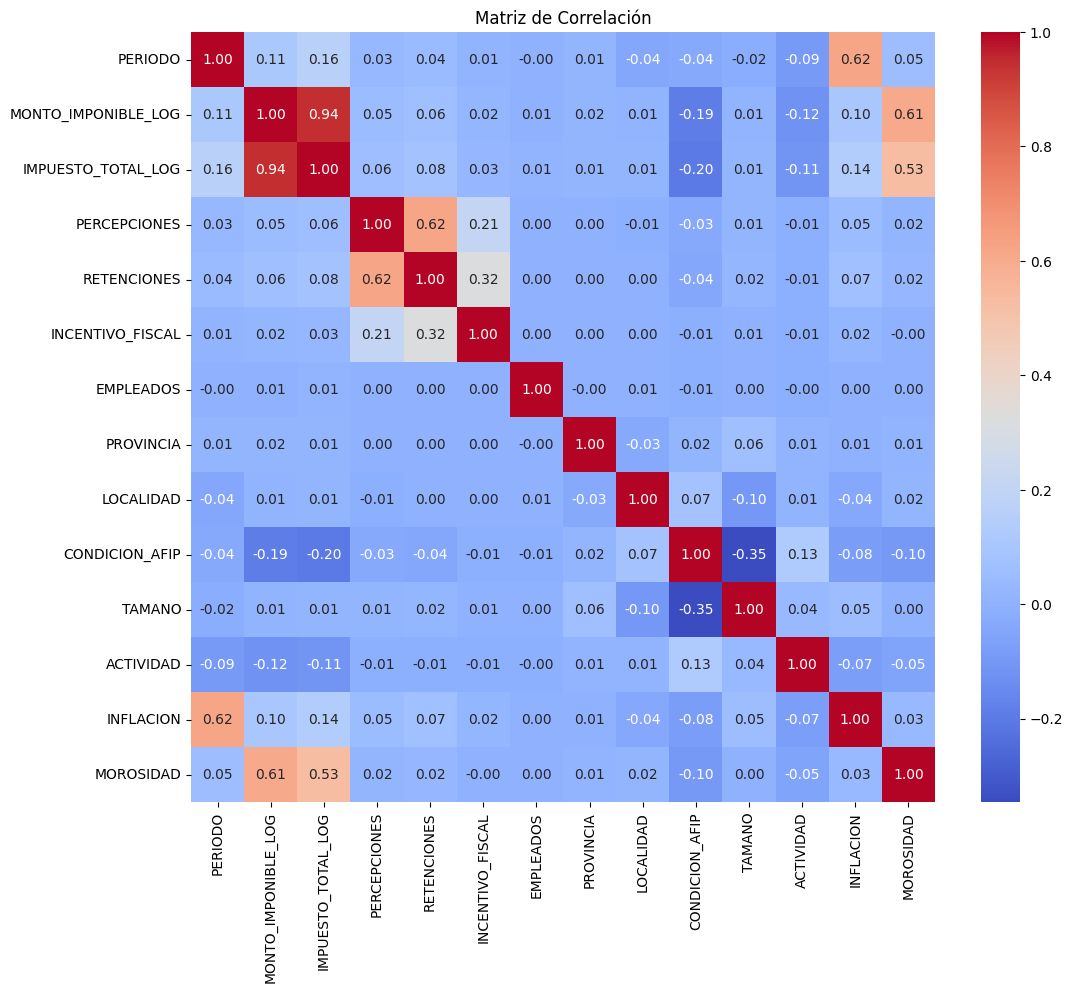

In [18]:
# Importar las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Calcular la matriz de correlación
matriz_correlacion = dataset_work_7.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### Resguardamos el DataSet

Resguardamos el dataset resultante en un nuevo archivo para poder seguir procesandolo.

In [20]:
import pandas as pd

# Especifica el nombre del archivo CSV donde se guardarán los datos
output_file = 'D:\DataSet\dataset_work_3.csv'

# Guarda el DataFrame en un archivo CSV
dataset_work_7.to_csv(output_file, index=False, encoding='utf-8')

# Mensaje de confirmación
print(f'DataFrame guardado en {output_file}')

DataFrame guardado en D:\DataSet\dataset_work_3.csv
